# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 1.24250044e+00, -1.17066925e+00],
        [-1.80626337e+00,  1.31457883e+00],
        [ 7.79133888e-01, -8.47126175e-01],
        [-4.23588446e-01,  2.02404504e-04],
        [ 6.21047422e-01,  1.66890846e+00]]),
 array([0, 1, 1, 1, 0]))

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [4]:
sigma_inv = np.linalg.inv(sigma)

In [5]:
# sampling
Y_generative = np.random.binomial(1, 0.5, 1000)*2-1
X_generative = np.zeros((1000, 2))
X_generative[Y_generative==1] = np.random.multivariate_normal(m1, sigma, sum(Y_generative==1))
X_generative[Y_generative==-1] = np.random.multivariate_normal(m2, sigma, sum(Y_generative==-1))

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


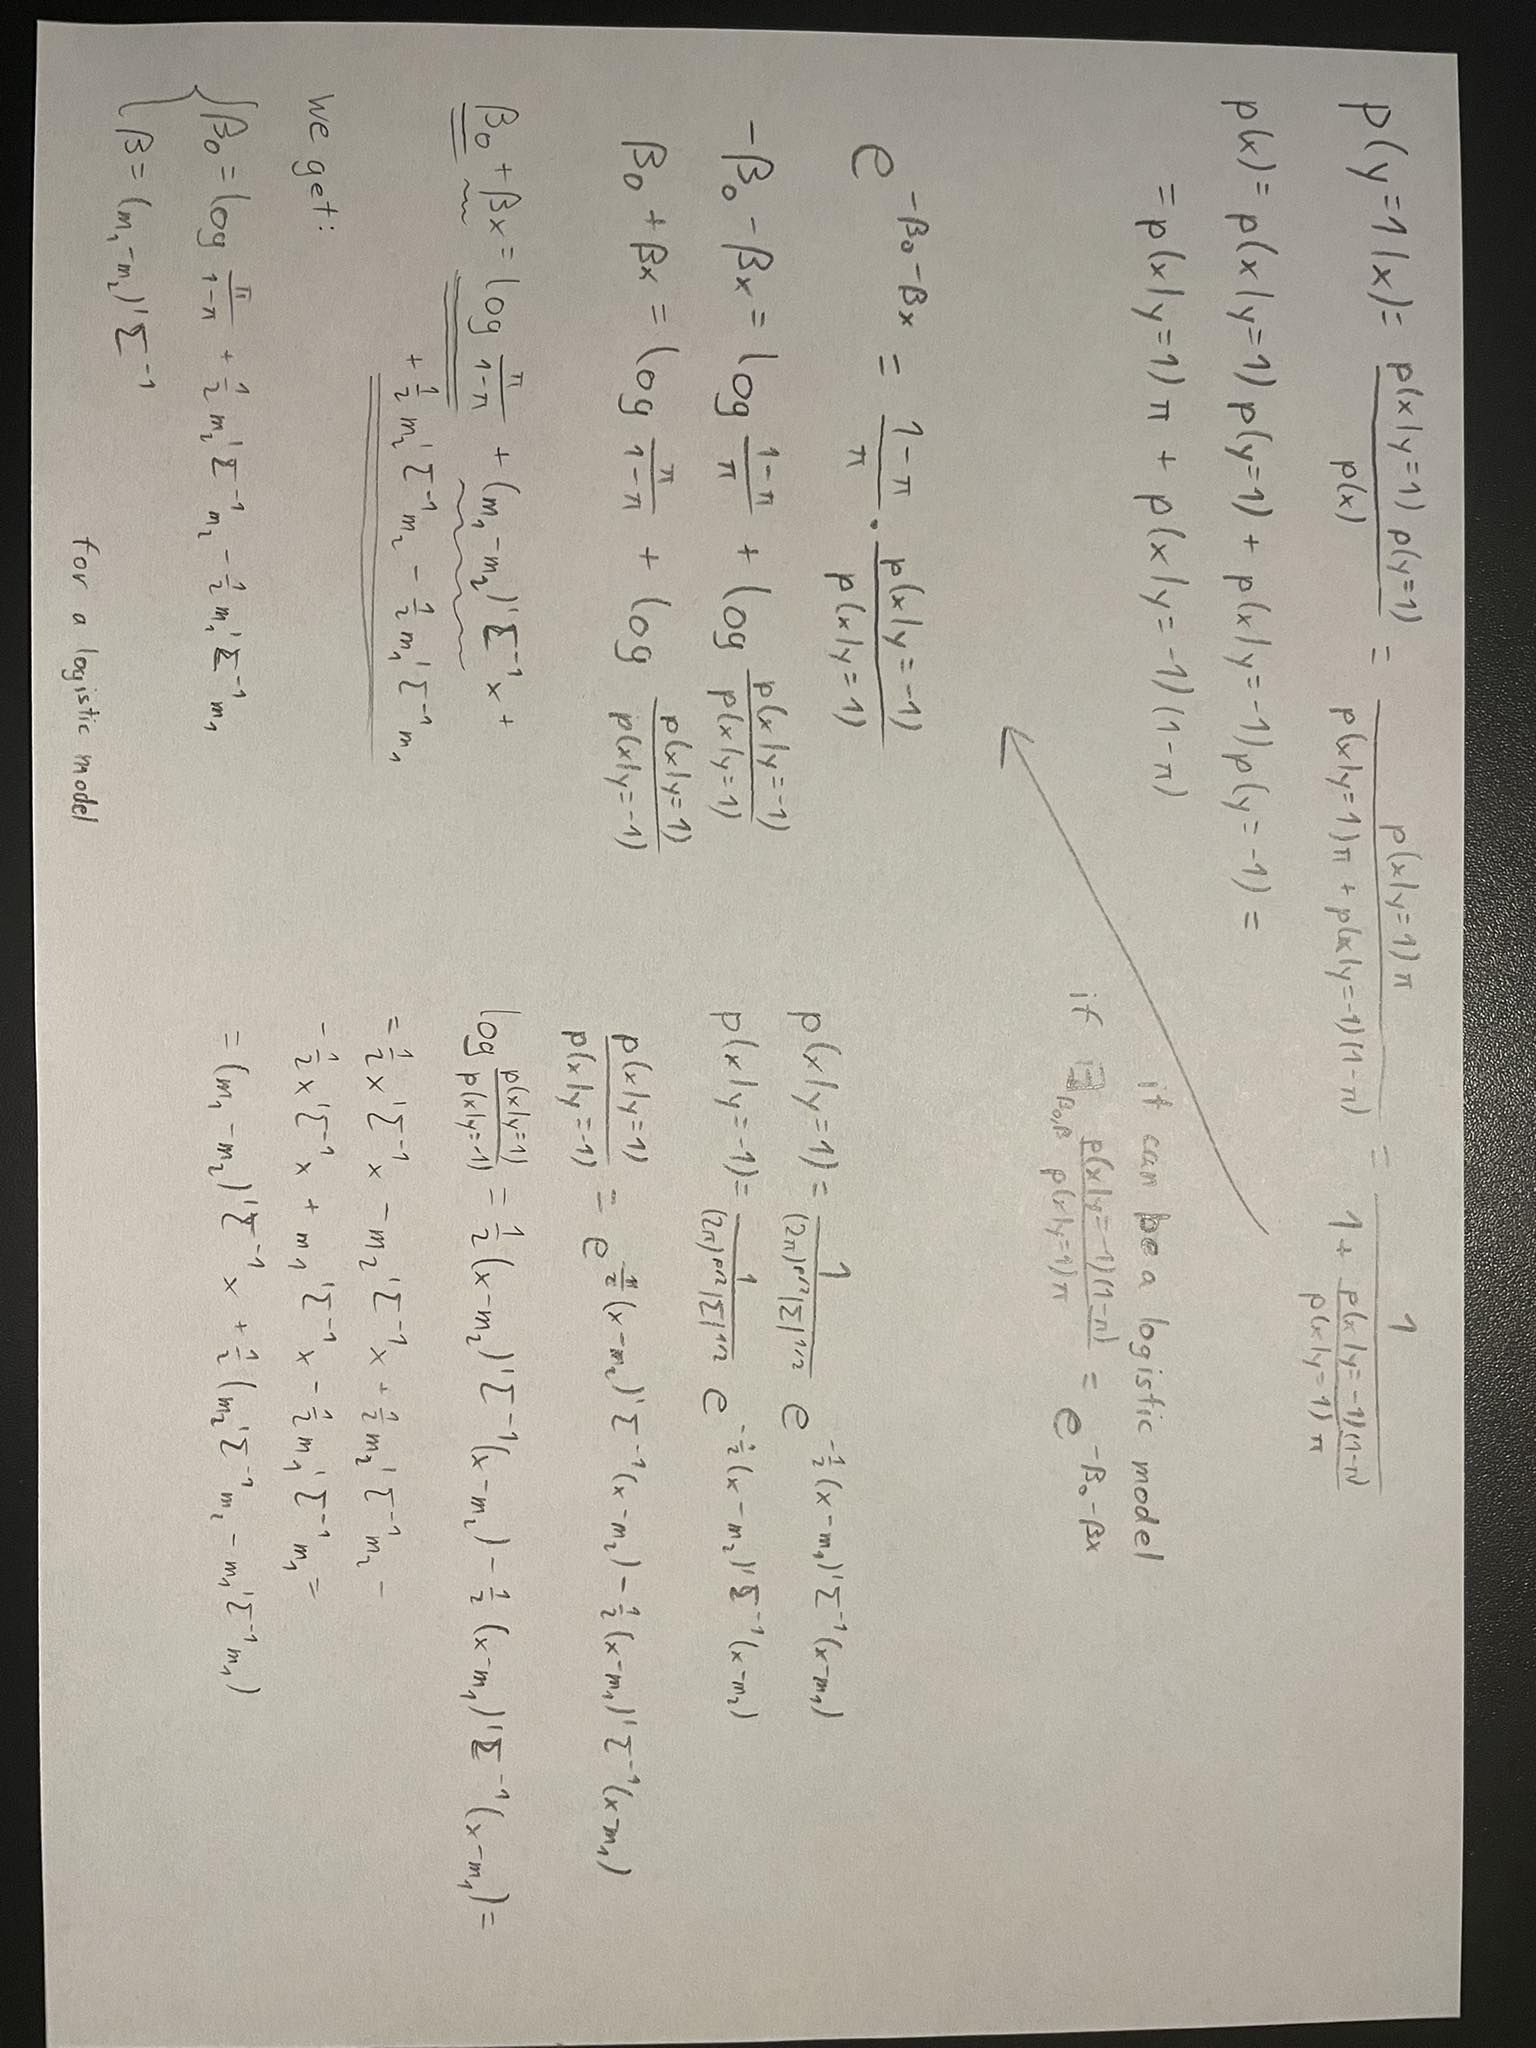

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [6]:
# computing beta_0 and beta using the formulas
beta0 = np.log(0.5/(1-0.5)) + m2@sigma_inv@m2.T/2 - m1@sigma_inv@m1.T/2
beta = sigma_inv@(m1-m2)
beta0, beta

(-2.0, array([2., 2.]))

In [7]:
def bayes(x):
    exp = np.exp(beta0+beta@x)
    return exp/(1+exp)

In [8]:
probs = np.apply_along_axis(bayes, 1, X_generative)

In [9]:
answers = np.where(probs<0.5, -1, 1)
answers==Y_generative

array([ True,  True, False, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,

In [10]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-1.94149349]), array([[1.84224564, 1.91461048]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [11]:
# sampling
X_discriminative = np.concatenate((np.random.multivariate_normal(m1, sigma, 500),
                                   np.random.multivariate_normal(m2, sigma, 500)), axis=0)
Y_discriminative = np.random.binomial(1, 1/(1+np.exp(-beta0-beta@X_discriminative.T)), 1000)

In [12]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.87104931]), array([[2.11478891, 1.96526225]]))

#### Second bullet point

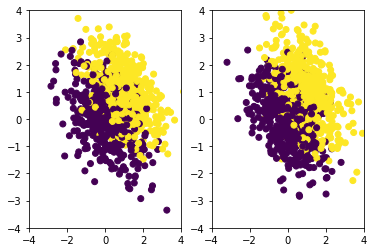

In [13]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:, 0], X_generative[:, 1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:, 0], X_discriminative[:, 1], c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

_Answer:_ the results look the same; both approaches differ only by algorithms and parameters

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

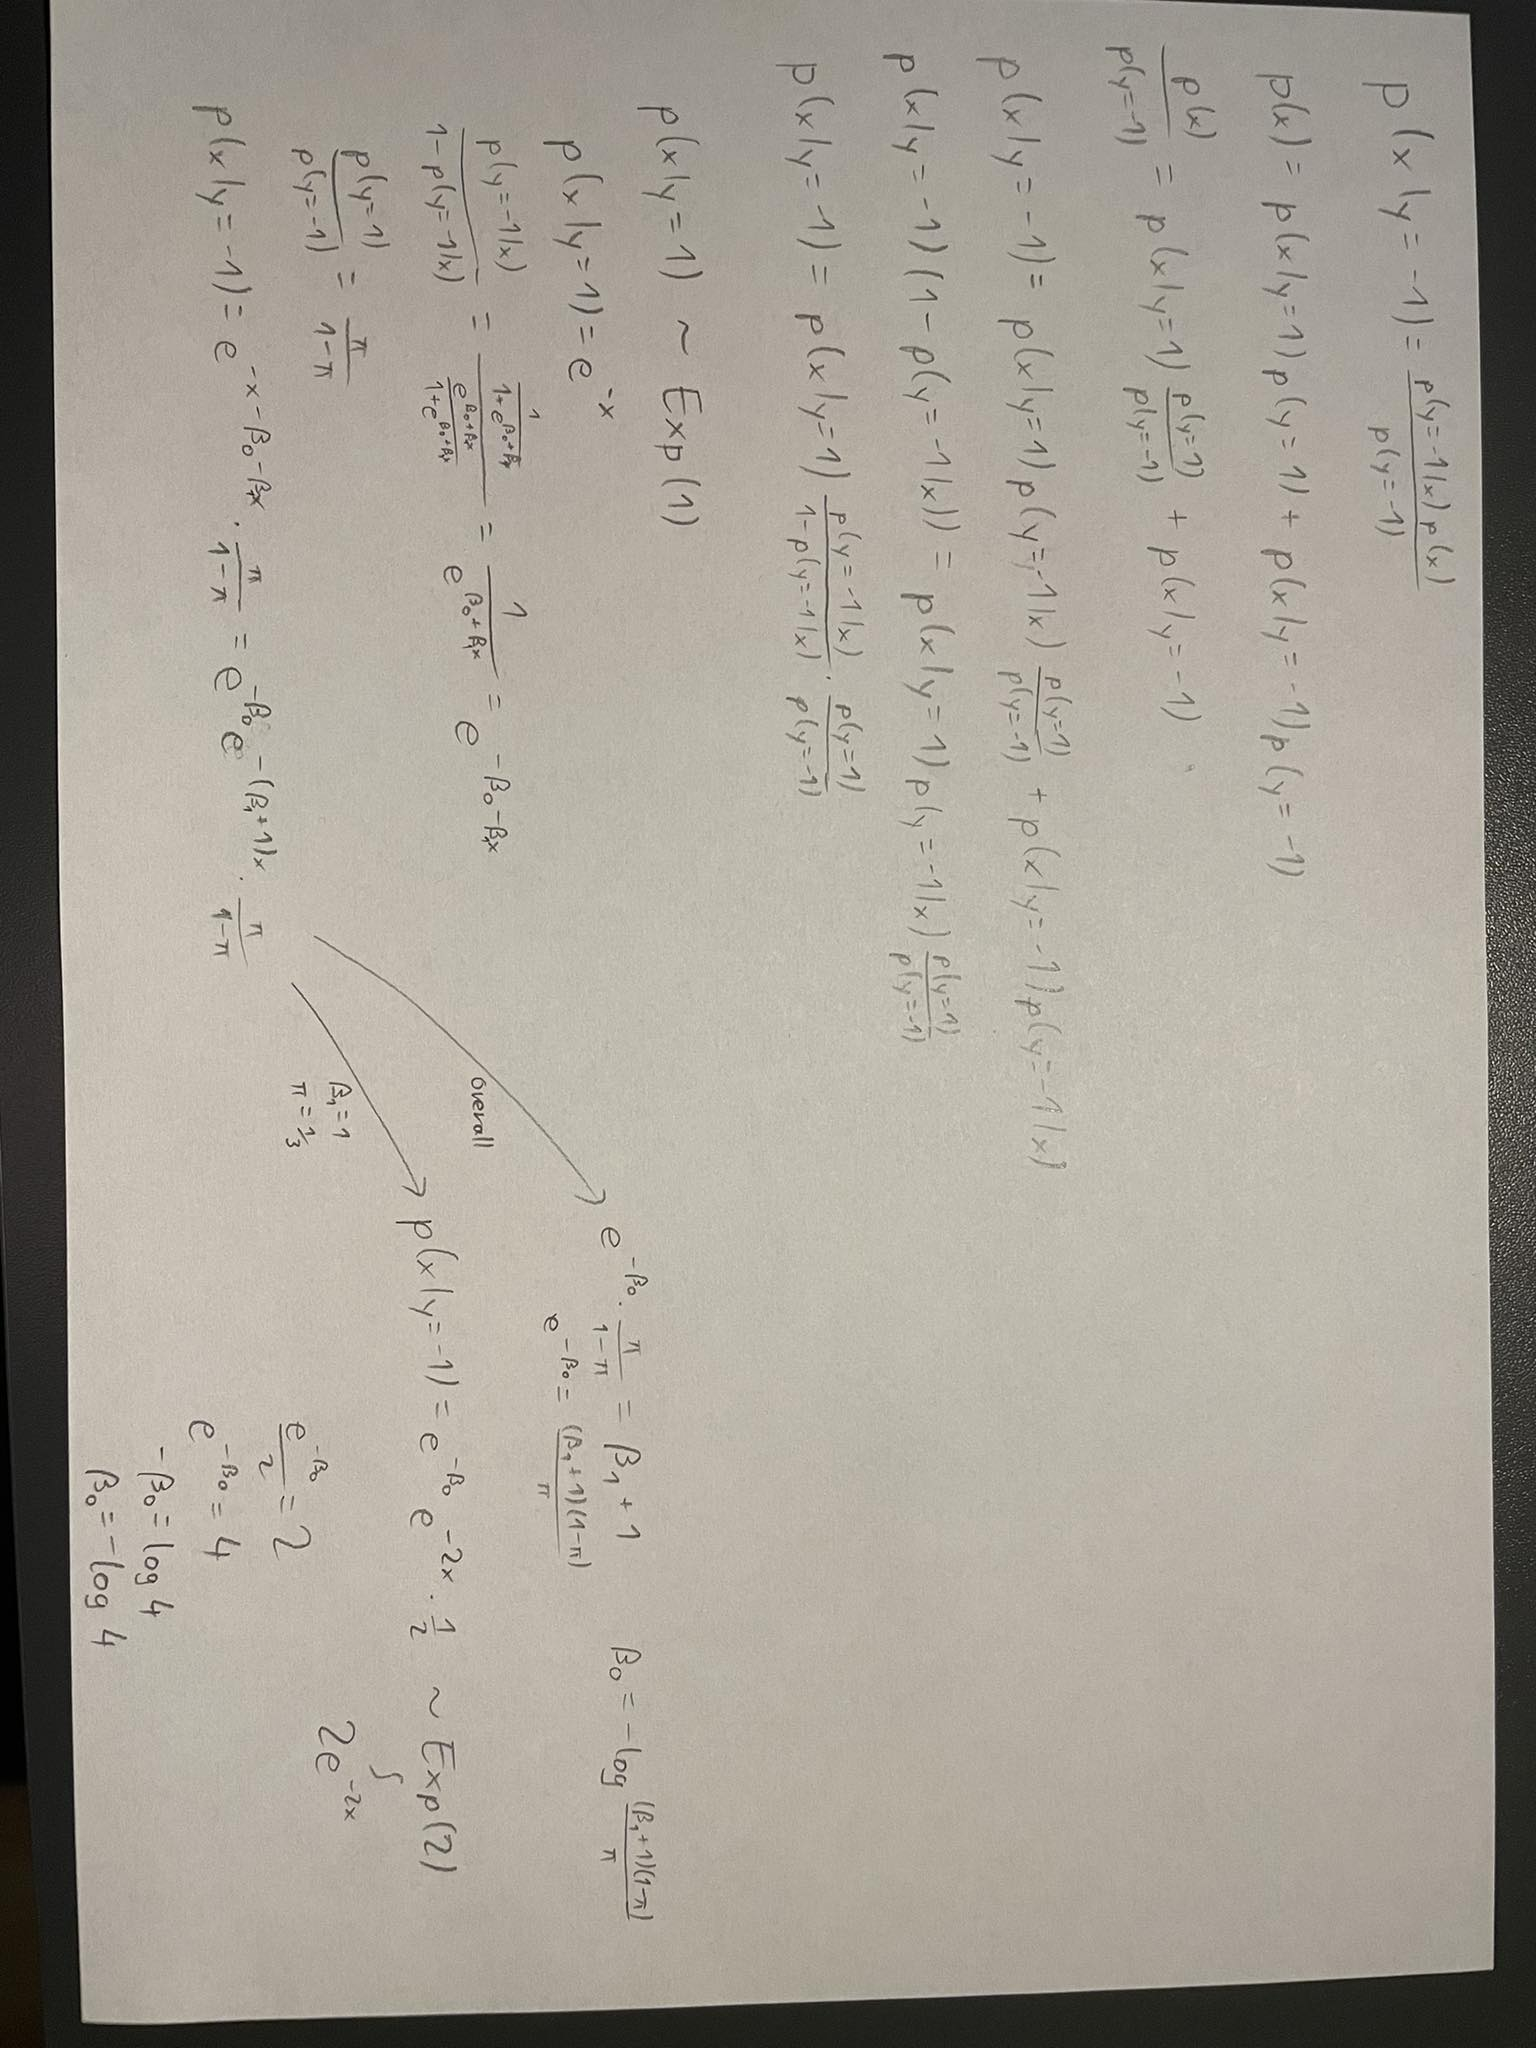

In [18]:
# sampling

n1 = 1000
exp_lambda1 = 1
x1 = np.random.exponential(1/exp_lambda1, size=(n1, 2))
y1 = np.ones(n1)

n2 = 2000
exp_lambda2 = 2
x2 = np.random.exponential(1/exp_lambda2, size=(n2, 2))
y2 = np.zeros(n2)

In [19]:
x12 = np.concatenate((x1, x2), axis=0)
y12 = np.concatenate((y1, y2))

In [20]:
# a model
mod_c = LogisticRegression(penalty=None)
mod_c.fit(x12, y12)
(mod_c.intercept_, mod_c.coef_)

(array([-2.05101827]), array([[0.97290776, 0.98021563]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What is a norming constant?

...

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [21]:
beta1 = 1
pi_c = n1/(n1 + n2)
beta0 = -np.log((beta1+1)*(1-pi_c)/pi_c)

In [22]:
beta0

-1.3862943611198908